In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

In [2]:
α = 0.5
𝛽 = 0.3
N0 = 1000000
S0 = 990000
I0 = 7000
R0 = 3000
t0, tf = 0, 25

In [3]:
def dSdt(t, S):
    return ( - (α * S))

soln_s = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True)
print(soln_s)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fbadbe7f6d0>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


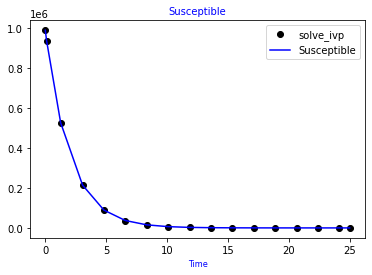

In [4]:
t_s, y_s = soln_s.t, soln_s.y[0]
z_s, = soln_s.sol(t_s)
plt.plot(t_s, y_s, 'o', color='k', label='solve_ivp')
plt.plot(t_s, z_s, color='blue', label='Susceptible')

plt.title('Susceptible', fontsize=10, color='blue')
plt.xlabel('Time', fontsize=8, color='blue') 

plt.legend()
plt.show()

In [5]:
def dIdt(t, I):
    return ((α * soln_s.sol(t)) - (𝛽 * I))

soln_i = solve_ivp(dIdt, (t0, tf), [I0], dense_output=True)
print(soln_i)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x7fbadbcf8c10>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08332734, 446699.01195851, 319077.83028019,
        165571.99131376,  71966.74863635,  29712.58392623,
         12130.57394035,   5009.75291414,   2075.26330114,
          1367.85128541]])
 y_events: None


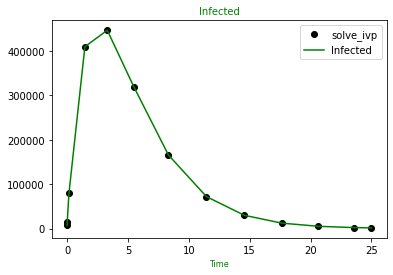

In [6]:
t_i, y_i = soln_i.t, soln_i.y[0]
z_i, = soln_i.sol(t_i)
plt.plot(t_i, y_i, 'o', color='k', label='solve_ivp')
plt.plot(t_i, z_i, color='green', label='Infected')

plt.title('Infected', fontsize=10, color='green')
plt.xlabel('Time', fontsize=8, color='green') 

plt.legend()
plt.show()

In [7]:
R = N0 - soln_s.sol(soln_i.t)[0] - y_i
interp_r = interp1d(soln_i.t, R, kind='linear')

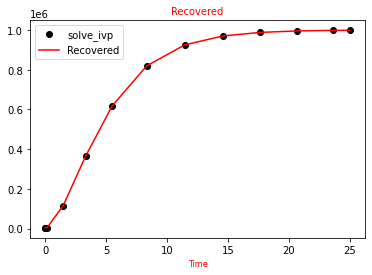

In [8]:
plt.plot(t_i, R, 'o', color='k', label='solve_ivp')
plt.plot(t_i, interp_r(t_i), color='red', label='Recovered')

plt.title('Recovered', fontsize=10, color='red')
plt.xlabel('Time', fontsize=8, color='red') 

plt.legend()
plt.show()

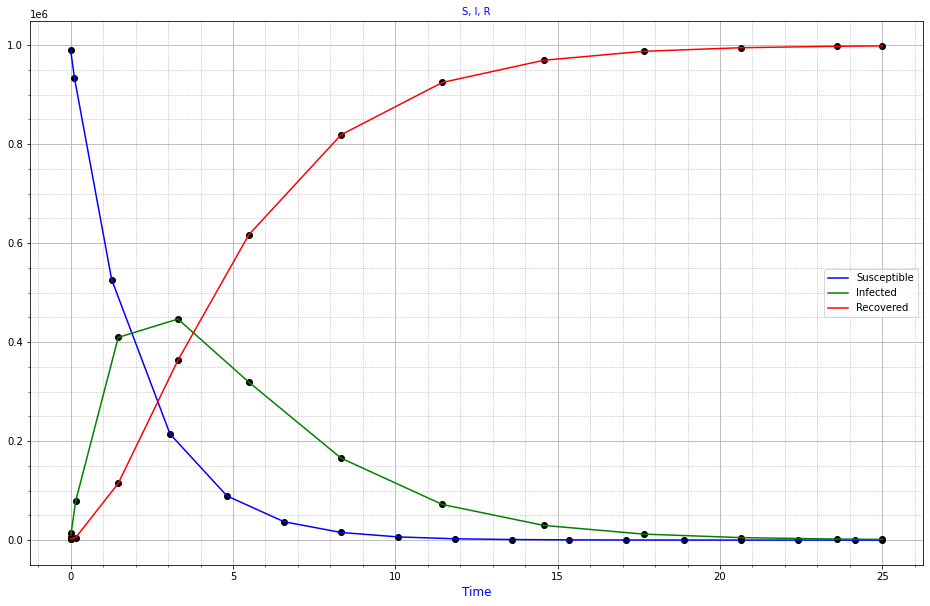

In [9]:
fig, ax = plt.subplots(figsize=(16, 10))

plt.title('S, I, R', fontsize=10, color='blue')
plt.xlabel('Time', fontsize=12, color='blue') 

plt.plot(t_s, y_s, 'o', color='k')
plt.plot(t_s, z_s, color='blue', label='Susceptible')

plt.plot(t_i, y_i, 'o', color='k')
plt.plot(t_i, z_i, color='green', label='Infected')

plt.plot(t_i, R, 'o', color='k')
plt.plot(t_i, interp_r(t_i), color='red', label='Recovered')

plt.legend()
plt.grid(which='major')
plt.minorticks_on()
plt.grid(which='minor', linestyle=':');